### Project Computer Vision ###

DOMAIN: Botanical Research

• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo. 

• DATA DESCRIPTION: The dataset comprises of images from 12 plant species. 

Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

• PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a phot

---


*** 1 . Import and Understand the data ***

***Q 1A . Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.***

***Ans 1A***
Use the ZipFile class to read and extract the zip file


In [1]:
# Import the required modules

import numpy as np
import pandas as pd
from zipfile import ZipFile
import os

In [2]:



#read the zip file
with ZipFile('ProjectComputerVision\plant-seedlings-classification.zip', 'r')  as zipfl:
    
    #Create a new folder CVZipExtrcat
    new_folder = 'CVZipExtrcat'
    # Construct the path 
    current_dir = os.getcwd()
    current_dir = current_dir + '\ProjectComputerVision'
    path = os.path.join(current_dir, new_folder)
    # create the new folder
    os.mkdir(path)
    
    #Extract the files
    zipfl.extractall(path=path)








***Q 1B. Map the images from train folder with train labels to form a DataFrame.***

***Ans 1B.***

In [3]:
from PIL import Image
import cv2
from glob import glob
from numpy import asarray

# declare the root species folder name
img_fldr_path = 'ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/'

# Create a emoty dataframe and use column names to store image name or file name,  folder or specirs name and actual image data
img_df = pd.DataFrame( columns=['img_nm', 'species', 'img_dat'])

# Get a list of subfolder path under the train folder
train_subFldr = [fldr.path for fldr in os.scandir(img_fldr_path) if fldr.is_dir()]

# Compile a list of spcecies
species_Lst = []

X_data = []

#Iterate the subfolder or species folder
for fldrpth in train_subFldr:
    print( 'folder : ', fldrpth )
    img_path = fldrpth + '/'
    # Obtain the folder name
    species_nm = os.path.basename(fldrpth)
    species_Lst.append(species_nm)
    # Obtain a list of image files under each species folder
    files =  os.listdir(img_path)
    for filNm in files:
        filPathNm = img_path + filNm
        # Read the image data
        img_bin = cv2.imread(filPathNm)
        img_arr = asarray(img_bin)
        X_data.append(img_arr)
        # Add the file name,  species name and image data to the dataframe
        img_df = img_df.append({'img_nm':filNm, 'species' : species_nm, 'img_dat': img_arr}, ignore_index=True)

    
  
img_df.shape

folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Black-grass
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Charlock
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Cleavers
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Common Chickweed
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Common wheat
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Fat Hen
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Loose Silky-bent
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Maize
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Scentless Mayweed
folder :  ProjectComputerVision/CVZipExtrcat/plant-seedlings-classification/train/Shepherds Purse
folder :  ProjectComputerVision/CVZipExtrcat/plant-seed

(4750, 3)


***Q 1C. Write a function that will select n random images and display images along with its species.***

***Ans 1C***

In [4]:
import random
import matplotlib.pyplot as plt

def dispImg(numofImg):
    if(numofImg > 10):
        numofImg = 10
    if(numofImg == 0):
         numofImg = 1
        
    max_size = len(img_df) - 1
    for i in range(0,numofImg):
        rndm_num = random.randint(0, max_size)
        img_temp = img_df['img_dat'][rndm_num]
        plt.imshow(img_temp)
        plt.show()
        print(" Species  :", img_df['species'][rndm_num] )
        print(" image nm :", img_df['img_nm'][rndm_num] )
    


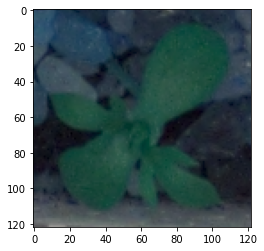

 Species  : Scentless Mayweed
 image nm : 8b227f1b2.png


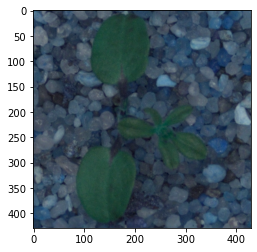

 Species  : Cleavers
 image nm : 0f557bb1a.png


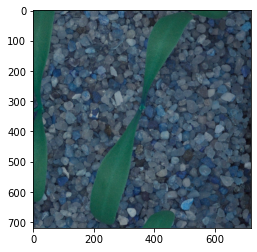

 Species  : Sugar beet
 image nm : 6d623072a.png


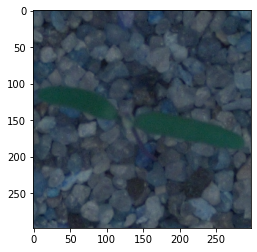

 Species  : Fat Hen
 image nm : d210b0125.png


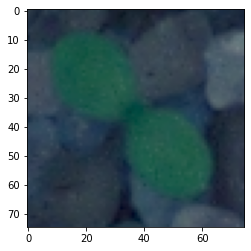

 Species  : Scentless Mayweed
 image nm : 35ebfa716.png


In [5]:
dispImg(5)


*** . Data preprocessing ***

***Q 2A Create X & Y from the DataFrame.***

***Ans 2A***

In [6]:
# Use the img data to X dataset
X = img_df['img_dat']

# Use the folder or species name as the target variable
Y = img_df['species']

In [7]:
print(X.shape)


(4750,)


***Q 2B. Encode labels of the images.***

***Ans 2B.***
Convert the string variables to a given range of integer numbers and them convert using categorical values for CNN  

In [8]:
from tensorflow.keras.utils import to_categorical

# Convert the labels to an integer nunmber

# Create a copy of the Y data the target variable
Y_cp = Y.copy()
# Itrerate through all the target values
for idx, spec_nm in enumerate(Y_cp):
    # Iterate through the Base species list for comparision
    for base_idx, base_spec_nm in enumerate(species_Lst):
        # if a match is confirmed ,  set the index value instead of the string species name
        if(spec_nm == base_spec_nm):
            Y_cp[idx] = base_idx
            break
            
# Use Keras to convert the integer values to a categorical for CNN
Y_cp = to_categorical(Y_cp, num_classes=None, dtype='int')
    
print(Y_cp[0])
print(Y[0])

[1 0 0 0 0 0 0 0 0 0 0 0]
Black-grass



***Q 2C. Unify shape of all the images***

***Ans 2C.***
Resize all the images to 128 X 128 pixels

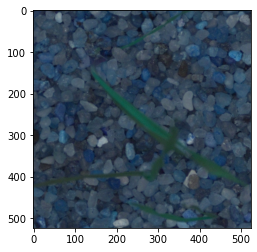

(524, 524, 3)
Black-grass 




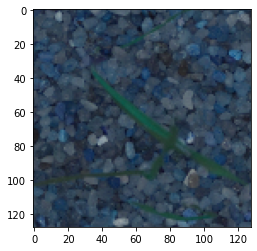

(128, 128, 3)
[1 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# Declare the standard images
std_wid = 128
std_ht  = 128

# Copy the Trainable data
X_cp = X.copy()

X_data1 = []

# Iterate through the inage data array and resize the image
for idx, img_dat in enumerate(X_cp):
    X_cp[idx]= cv2.resize(img_dat, (std_wid, std_ht))
    X_data1.append( X_cp[idx])


plt.imshow(X[55])
plt.show() 
print(X[55].shape)
print(Y[55], '\n\n')

plt.imshow(X_cp[55])
plt.show() 
print(X_cp[55].shape)
print(Y_cp[55])


***Q 2D. Normalise all the images.***

***Ans 2D.***

Since the pixel values range between 0 to 255,  divide the same by 255

In [10]:
X_arr_data = np.array(X_data1, np.float32) / 255.


In [11]:
print(X_arr_data.shape)
print(X_cp.shape)


(4750, 128, 128, 3)
(4750,)


In [12]:
print(X_arr_data[0])

[[[0.09411765 0.18431373 0.3019608 ]
  [0.12941177 0.21176471 0.31764707]
  [0.1764706  0.25882354 0.34901962]
  ...
  [0.21568628 0.30588236 0.34509805]
  [0.23529412 0.3372549  0.36862746]
  [0.20392157 0.3254902  0.3529412 ]]

 [[0.08235294 0.18039216 0.30980393]
  [0.14117648 0.22352941 0.3372549 ]
  [0.18039216 0.25882354 0.3529412 ]
  ...
  [0.23137255 0.3019608  0.34509805]
  [0.24313726 0.31764707 0.36078432]
  [0.22352941 0.3019608  0.34901962]]

 [[0.09411765 0.19215687 0.32156864]
  [0.12156863 0.21176471 0.32941177]
  [0.19607843 0.27058825 0.37254903]
  ...
  [0.22352941 0.28235295 0.32941177]
  [0.22745098 0.28235295 0.33333334]
  [0.23921569 0.3019608  0.34901962]]

 ...

 [[0.60784316 0.58431375 0.56078434]
  [0.6117647  0.5882353  0.5647059 ]
  [0.6039216  0.58431375 0.56078434]
  ...
  [0.5568628  0.53333336 0.5176471 ]
  [0.38039216 0.36078432 0.35686275]
  [0.2627451  0.23921569 0.2627451 ]]

 [[0.60784316 0.58431375 0.5568628 ]
  [0.6117647  0.5882353  0.5568628 ]



*** 3. Model training ***

***Q 3A. Split the data into train and test data.***

***Ans 3A***


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr_data, Y_cp, test_size=0.3, random_state=5)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)



***Q 3B. Create new CNN architecture to train the model. ***

***Ans 3B***


In [14]:
# Import CNN and dependent packages
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import BatchNormalization

# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='softmax'))

In [15]:
from keras.optimizers import Adam
#Compile the model
model.compile(optimizer = Adam(learning_rate=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 64)       2


***Q 3C. . Train the model on train data and validate on test data.***

***Ans 3C.***

In [16]:
# Train the cnn model using the training data
history = model.fit(X_train, y_train, batch_size=128, epochs=20,  validation_split=0.2, verbose=1)

Epoch 1/20
21/21 [==============================] - 17s 744ms/step - loss: 2.3234 - accuracy: 0.2094 - val_loss: 2.4356 - val_accuracy: 0.1353
Epoch 2/20
21/21 [==============================] - 15s 698ms/step - loss: 1.8574 - accuracy: 0.3508 - val_loss: 2.3274 - val_accuracy: 0.2150
Epoch 3/20
21/21 [==============================] - 14s 685ms/step - loss: 1.4446 - accuracy: 0.5154 - val_loss: 2.2374 - val_accuracy: 0.2782
Epoch 4/20
21/21 [==============================] - 14s 679ms/step - loss: 1.1591 - accuracy: 0.6147 - val_loss: 2.1299 - val_accuracy: 0.3278
Epoch 5/20
21/21 [==============================] - 14s 660ms/step - loss: 0.9996 - accuracy: 0.6703 - val_loss: 2.0111 - val_accuracy: 0.3429
Epoch 6/20
21/21 [==============================] - 14s 655ms/step - loss: 0.8808 - accuracy: 0.7154 - val_loss: 1.8708 - val_accuracy: 0.4677
Epoch 7/20
21/21 [==============================] - 14s 659ms/step - loss: 0.7906 - accuracy: 0.7459 - val_loss: 1.8160 - val_accuracy: 0.4812


***Q 3D. Select a random image and print actual label and predicted label for the same***

***Ans 3D.***



In [17]:
# Evaluate the model
mdl_score, mdl_acc = model.evaluate(X_test,y_test)

45/45 [==============================] - 2s 45ms/step - loss: 0.9851 - accuracy: 0.6807


In [18]:
# use a random number to evaluate the model
max_size = len(X_test) - 1
rndm_num = random.randint(0, max_size)
print("Random Number : ", rndm_num)

Random Number :  1189


In [19]:
# Predict and validate the results
predictions = model.predict(X_test)

45/45 [==============================] - 4s 41ms/step


In [20]:
print( 'Predictions : ', predictions[rndm_num] )

Predictions :  [5.3511598e-05 4.0067488e-01 1.3251650e-01 2.0522065e-03 1.8937734e-03
 1.4069297e-04 5.8377045e-03 1.7051591e-02 3.2596833e-01 6.6368423e-02
 8.2377428e-03 3.9204642e-02]


In [21]:
print('Predicted Value : ', np.argmax( predictions[rndm_num] ))

Predicted Value :  1


In [22]:
print('Actual Value : ', y_test[rndm_num] )

Actual Value :  [0 0 0 0 0 0 0 0 1 0 0 0]




---

***Part B***


DOMAIN: Botanical Research

• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have 
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s 
species from a photo.

• DATA DESCRIPTION: The dataset comprises of images from 17 plant species.

• PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image


***Q 1A. . Import and read oxflower17 dataset from tflearn and split into X and Y while loading.***

***Ans 1A***


In [23]:
#import the oxford image packages to load
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [24]:
# Load the image data
X_B, Y_B =  oxflower17.load_data() 

In [25]:
X_B[0]

array([[[0.6784314 , 0.7176471 , 0.47843137],
        [0.59607846, 0.6392157 , 0.3882353 ],
        [0.7019608 , 0.74509805, 0.4745098 ],
        ...,
        [0.7411765 , 0.7647059 , 0.5019608 ],
        [0.87058824, 0.8784314 , 0.59607846],
        [0.79607844, 0.7921569 , 0.47843137]],

       [[0.75686276, 0.79607844, 0.5529412 ],
        [0.6156863 , 0.65882355, 0.40392157],
        [0.7137255 , 0.75686276, 0.4862745 ],
        ...,
        [0.654902  , 0.68235296, 0.40392157],
        [0.7607843 , 0.77254903, 0.47843137],
        [0.7764706 , 0.78039217, 0.46666667]],

       [[0.85490197, 0.8980392 , 0.6392157 ],
        [0.8039216 , 0.84705883, 0.5882353 ],
        [0.70980394, 0.7529412 , 0.4862745 ],
        ...,
        [0.85882354, 0.89411765, 0.59607846],
        [0.7137255 , 0.73333335, 0.43529412],
        [0.7294118 , 0.74509805, 0.43137255]],

       ...,

       [[0.59607846, 0.6117647 , 0.2509804 ],
        [0.42745098, 0.42745098, 0.1254902 ],
        [0.5568628 , 0


***Q 1B. Print Number of images and shape of the images.***

***Ans 1B.***


In [26]:
X_B.shape

(1360, 224, 224, 3)

In [27]:
Y_B.shape

(1360,)

In [28]:
print("Number of images : " , Y_B.size)
print("Shape of images  : " , X_B.shape)

Number of images :  1360
Shape of images  :  (1360, 224, 224, 3)



***Q 1C. . Print count of each class from y.***

***Ans 1C.***


In [29]:
temp_df = pd.DataFrame( {'Image_class': Y_B})

In [30]:
temp_df['Image_class'].value_counts()

12    80
15    80
9     80
6     80
4     80
14    80
13    80
3     80
16    80
0     80
1     80
2     80
7     80
10    80
8     80
11    80
5     80
Name: Image_class, dtype: int64

In [31]:
print('There are 17 classes with 80 images for each')

There are 17 classes with 80 images for each


***2. Image Exploration & Transformation***

***2A . Display 5 random images.***


Random Number :  839


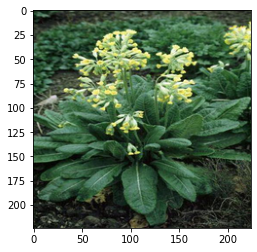

5 


Random Number :  92


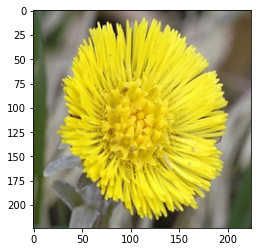

3 


Random Number :  988


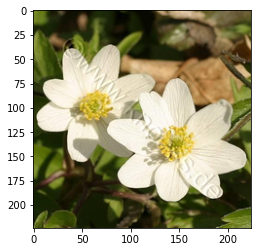

7 


Random Number :  1034


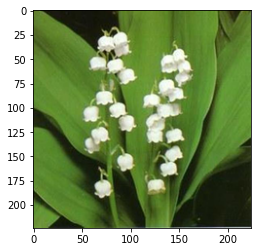

9 


Random Number :  34


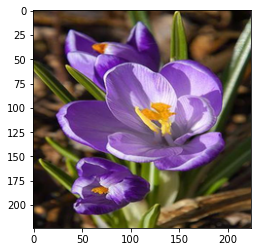

11 




In [32]:

for i in range(0,5):
    rndm_num = random.randint(0, Y_B.size-1)
    print('Random Number : ', rndm_num)
    img_temp = X_B[rndm_num]
    plt.imshow(img_temp)
    plt.show() 
    print(Y_B[rndm_num], '\n\n')



***Q 2B. Select any image from the dataset and assign it to a variable***

***Ans 2B.***



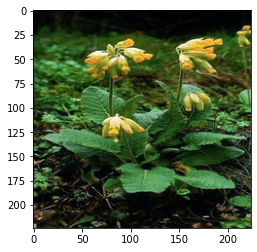

In [33]:
Img_partb_data = X_B[537]
plt.imshow(Img_partb_data)
plt.show() 


***Q 2C. Transform the image into grayscale format and display the same.***

***Ans 2C.***



In [34]:
X_B[537].shape

(224, 224, 3)

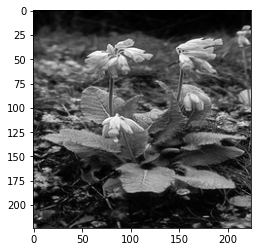

In [35]:
plt.imshow(X_B[537][:,:,1] ,  cmap='gray')
plt.show() 


***Q 2D. Apply a filter to sharpen the image and display the image before and after sharpening.***

***Ans 2D.***

Orginal image


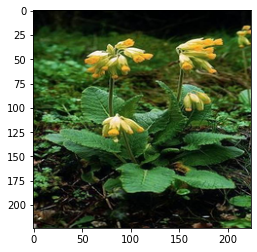




Sharpened image


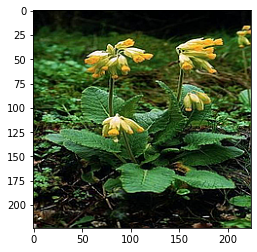

In [36]:
from PIL import ImageFilter
arr_cp = X_B[537].copy()
img_rs_arr = np.asarray(arr_cp).astype('float32')
aardata1 = Image.fromarray((img_rs_arr* 255).astype(np.uint8))
print('Orginal image')
plt.imshow(aardata1)
plt.show()
print('\n\n')
print('Sharpened image')
sharp_img = aardata1.filter(ImageFilter.SHARPEN)
plt.imshow(sharp_img)
plt.show()


***Q 2E. Apply a filter to blur the image and display the image before and after blur.***

***Ans 2E***


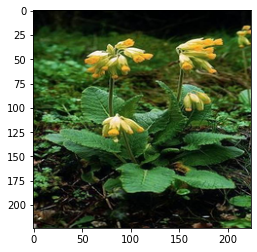




Blurred image


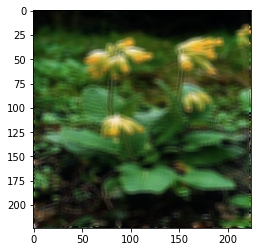

In [37]:

plt.imshow(aardata1)
plt.show()
print('\n\n')
print('Blurred image')
blur_img = aardata1.filter(ImageFilter.BLUR)
plt.imshow(blur_img)
plt.show()


***Q 2F. Display all the 4 images from above questions besides each other to observe the difference. ***

***Ans 2F.***

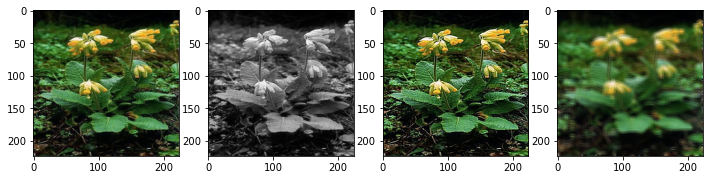

In [38]:
plt.figure(figsize=(12,12))

plt.subplot(1, 4, 1)
plt.imshow(aardata1)

plt.subplot(1, 4, 2)
plt.imshow(X_B[537][:,:,1] ,  cmap='gray')

plt.subplot(1, 4, 3)
plt.imshow(sharp_img)

plt.subplot(1, 4, 4)
plt.imshow(blur_img)

plt.show()

3. Model training and Tuning:
    
***Q 3A. Split the data into train and test with 80:20 proportion.***
    
***Ans 3A.***



In [39]:
# split the data using train_test_split
XB_train, XB_test, yb_train, yb_test = train_test_split(X_B, Y_B, test_size=0.2, random_state=5)


***Q 3B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.***

***Ans 3B.***

In [40]:
# import KNN libraries to train the model using supervised training technique
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [41]:
# reshaping X data: (n, 224, 224) => (n, 50176)
XB_knn_train = XB_train.reshape((XB_train.shape[0], -1))
XB_knn_test = XB_test.reshape((XB_test.shape[0], -1))


In [42]:
#Define hyper paramter for KNN classifier model
KNN_Classifiers = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

In [43]:
# Train the KNN model using training data 
KNN_Classifiers.fit( XB_knn_train, yb_train )

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [44]:
y_predicted_labels = KNN_Classifiers.predict( XB_knn_test )
KNN_Classifiers.score( XB_knn_test, yb_test )

0.3235294117647059


***Q 3C. Train a model using Neural Network and share performance metrics on test data.***

***Ans 3C.***


In [45]:
#import the additional tensorflow packages over and above ones imported
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, InputLayer
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report



In [46]:
# reshaping X data: (n, 224, 224) => (n, 50176)
XB_ann_train = XB_train.reshape((XB_train.shape[0], -1))
XB_ann_test = XB_test.reshape((XB_test.shape[0], -1))


In [47]:
# converting y data into categorical (one-hot encoding)
yb_ann_train = to_categorical(yb_train)
yb_ann_test = to_categorical(yb_test)

In [48]:
print(XB_train.shape, XB_test.shape, yb_train.shape, yb_test.shape)

(1088, 224, 224, 3) (272, 224, 224, 3) (1088,) (272,)


In [49]:
print(XB_ann_train.shape, XB_ann_test.shape, yb_ann_train.shape, yb_ann_test.shape)

(1088, 150528) (272, 150528) (1088, 17) (272, 17)


In [50]:
# define the ANN model
model = tf.keras.Sequential()

model.add( InputLayer( input_shape=(150528,) ) )
model.add( Dense( 64, activation='relu') )
#model.add( BatchNormalization() )
model.add( Dense( 64, activation='relu' ) )
#model.add( BatchNormalization() )
model.add( Dense( 64, activation='relu' ) )
#model.add( BatchNormalization() )
model.add( Dense( 32, activation='relu' ) )

model.add( Dense( 17, activation='softmax') )

In [51]:
# Configure and compile the ANN model
model.compile( loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
#model.compile( loss='categorical_crossentropy', optimizer=optimizers.SGD(learning_rate = 0.001), metrics=['accuracy'])

In [52]:
# Train the ANN model
history_ann=model.fit(XB_ann_train, yb_ann_train, batch_size=128, validation_split=0.2, epochs=20, verbose=2)

Train on 870 samples, validate on 218 samples
Epoch 1/20
870/870 - 1s - loss: 13.9307 - acc: 0.0644 - val_loss: 11.2077 - val_acc: 0.0459 - 519ms/epoch - 596us/sample
Epoch 2/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


870/870 - 0s - loss: 6.5693 - acc: 0.0678 - val_loss: 4.5459 - val_acc: 0.0826 - 493ms/epoch - 566us/sample
Epoch 3/20
870/870 - 0s - loss: 3.9564 - acc: 0.0586 - val_loss: 3.2410 - val_acc: 0.0550 - 458ms/epoch - 526us/sample
Epoch 4/20
870/870 - 1s - loss: 3.0829 - acc: 0.0851 - val_loss: 2.8712 - val_acc: 0.1009 - 508ms/epoch - 584us/sample
Epoch 5/20
870/870 - 1s - loss: 2.7612 - acc: 0.1046 - val_loss: 2.7524 - val_acc: 0.0917 - 572ms/epoch - 658us/sample
Epoch 6/20
870/870 - 0s - loss: 2.5863 - acc: 0.1609 - val_loss: 2.6990 - val_acc: 0.1009 - 493ms/epoch - 567us/sample
Epoch 7/20
870/870 - 0s - loss: 2.4717 - acc: 0.2161 - val_loss: 2.6775 - val_acc: 0.1514 - 468ms/epoch - 537us/sample
Epoch 8/20
870/870 - 0s - loss: 2.3975 - acc: 0.2506 - val_loss: 2.5680 - val_acc: 0.1651 - 432ms/epoch - 496us/sample
Epoch 9/20
870/870 - 0s - loss: 2.2498 - acc: 0.3034 - val_loss: 2.6658 - val_acc: 0.1789 - 470ms/epoch - 540us/sample
Epoch 10/20
870/870 - 0s - loss: 2.1762 - acc: 0.3195 - val

In [53]:
ann_results = model.evaluate(XB_ann_test, yb_ann_test)

In [54]:
print('Test accuracy: ', ann_results[1])

Test accuracy:  0.38602942


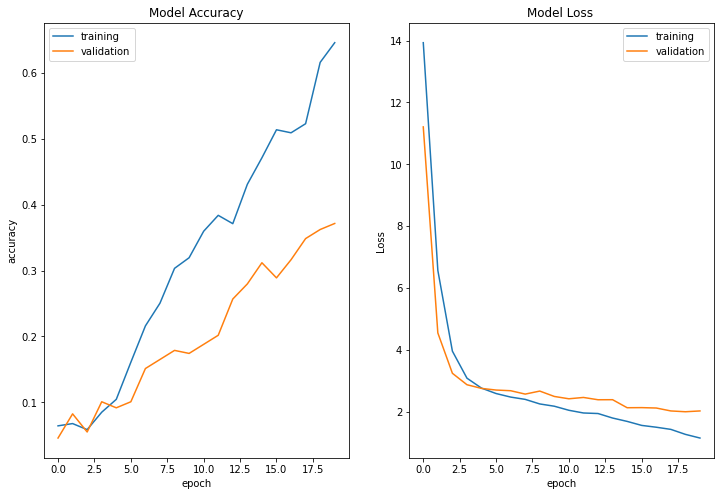

In [55]:
# Plot the accuracy and validation accuracy of ANN model
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['acc'])
plt.plot(history_ann.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model Loss ')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='best')

plt.show()


***Q 3D. Train a model using a basic CNN and share performance metrics on test data.***

***Ans 3D.***


In [56]:
# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=64, kernel_size=2, input_shape=(224, 224, 3), activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=3))
model_cnn.add(Conv2D(filters=64, kernel_size=2, activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=3))
model_cnn.add(Conv2D(filters=64, kernel_size=2, activation='relu'))

model_cnn.add(MaxPooling2D(pool_size=3))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(17, activation='softmax'))

In [57]:
XB_cnn_train = XB_train 
XB_cnn_test = XB_test 

In [58]:
# converting y data into categorical (one-hot encoding)
yb_cnn_train = to_categorical(yb_train)
yb_cnn_test = to_categorical(yb_test)

In [59]:
print(XB_train.shape, XB_test.shape, yb_train.shape, yb_test.shape)

(1088, 224, 224, 3) (272, 224, 224, 3) (1088,) (272,)


In [60]:
print(XB_cnn_train.shape, XB_cnn_test.shape, yb_cnn_train.shape, yb_cnn_test.shape)

(1088, 224, 224, 3) (272, 224, 224, 3) (1088, 17) (272, 17)


In [61]:
yb_test[9]

11

In [74]:
# Configure and Compile the model 
model_cnn.compile(optimizer = Adam(learning_rate=0.0001) , loss = "categorical_crossentropy", metrics=["accuracy"]) 

In [75]:
# Train the CNN model
history_cnn = model_cnn.fit(XB_cnn_train, yb_cnn_train, batch_size=136, epochs=20,  validation_data=( XB_cnn_test, yb_cnn_test), verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 - 18s - loss: 2.2808 - acc: 0.3189 - val_loss: 2.3739 - val_acc: 0.2169 - 18s/epoch - 17ms/sample
Epoch 2/20
1088/1088 - 17s - loss: 2.2514 - acc: 0.2950 - val_loss: 2.3667 - val_acc: 0.2316 - 17s/epoch - 16ms/sample
Epoch 3/20
1088/1088 - 17s - loss: 2.2161 - acc: 0.3346 - val_loss: 2.3301 - val_acc: 0.2574 - 17s/epoch - 16ms/sample
Epoch 4/20
1088/1088 - 17s - loss: 2.1875 - acc: 0.3364 - val_loss: 2.3050 - val_acc: 0.2353 - 17s/epoch - 16ms/sample
Epoch 5/20
1088/1088 - 17s - loss: 2.1579 - acc: 0.3392 - val_loss: 2.2803 - val_acc: 0.2574 - 17s/epoch - 16ms/sample
Epoch 6/20
1088/1088 - 17s - loss: 2.1261 - acc: 0.3566 - val_loss: 2.2629 - val_acc: 0.2574 - 17s/epoch - 16ms/sample
Epoch 7/20
1088/1088 - 17s - loss: 2.0948 - acc: 0.3768 - val_loss: 2.2261 - val_acc: 0.2721 - 17s/epoch - 16ms/sample
Epoch 8/20
1088/1088 - 17s - loss: 2.0629 - acc: 0.3686 - val_loss: 2.1909 - val_acc: 0.2757 - 17s/epoch - 16ms/sample
E

In [76]:
cnn_results = model_cnn.evaluate(XB_cnn_test, yb_cnn_test)

In [77]:
print('Test accuracy: ', cnn_results[1])

Test accuracy:  0.4007353


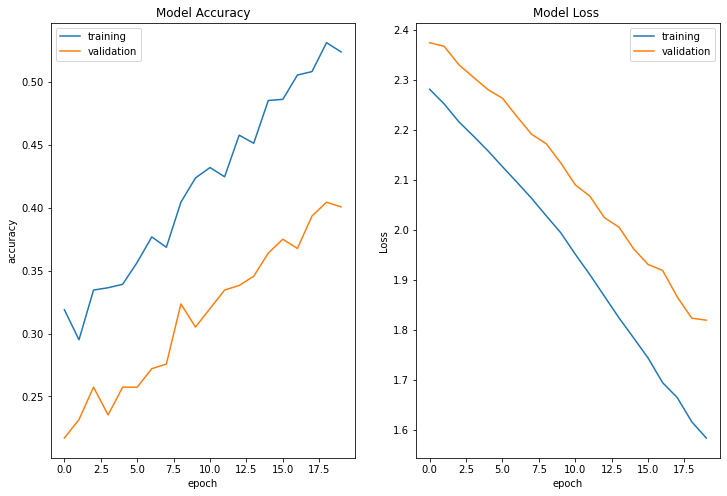

In [78]:
# Plot the accuracy and validation accuracy of CNN model
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss ')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='best')

plt.show()


***Q 3E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label***

***Ans 3E.***

(224, 224, 3)


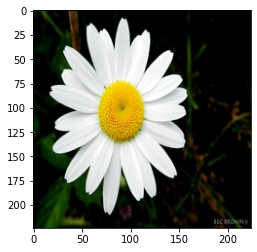

In [79]:
# Load the  image to predict
pred_img = Image.open("ProjectComputerVision/Prediction.jpg")
pred_img_arr = np.asarray(pred_img)
print(pred_img_arr.shape)
plt.imshow(pred_img_arr)

In [80]:
# Covert the values between 0 and 1 as the training data is normalized one
pred_img_arr = pred_img_arr / 255.

In [85]:
# Reshape the image array to training shape and predit the image class
pred_img_arr = np.reshape(pred_img_arr,[1,224,224,3])
classes=np.argmax(model_cnn.predict(pred_img_arr) ,axis=1)


In [86]:
classes[0]

7

In [87]:
print('Predicted Image class : ', classes[0])

Predicted Image class :  7
